In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor


In [2]:
def naive_roc_auc_score(y_true, y_pred):
  
  y_true = y_true.to_numpy()
  
  num_same_sign = 0
  num_pairs = 0
  
  for a in range(len(y_true)):
    for b in range(len(y_true)):
      if y_true[a] > y_true[b]:
        num_pairs += 1
        if y_pred[a] > y_pred[b]:
          num_same_sign += 1
        elif y_pred[a] == y_pred[b]:
          num_same_sign += .5
        
  return num_same_sign / num_pairs

from sklearn.metrics import make_scorer

score = make_scorer(naive_roc_auc_score, greater_is_better=True)

In [3]:

data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['LUMO_calc']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Abs Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [4]:
X = data.loc[:, ['Max Partial Charge', 'Min Partial Charge', 'NO Count', 'H Count',
         'C Count', 'N Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          2.901e+05
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                        0.00
Time:                        15:58:10   Log-Likelihood:                         -24894.
No. Observations:               41004   AIC:                                  4.980e+04
Df Residuals:                   40997   BIC:                                  4.986e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Partial Charge    -2.9302      0.033    -88.529      0.000      -2.995      -2.865
Min Partial Charge     2.0821      0.025     84.902      0.000       2.034       2.130
NO Count               0.0649      0.002     41.319      0.000       0.062       0.068
H Count                0.0830      0.001    134.001      0.000       0.082       0.084
C Count               -0.0682      0.000   -142.539      0.000      -0.069      -0.067
N Count               -0.1933      0.002   -128.374      0.000      -0.196      -0.190
Double Bonds          -0.1153      0.001    -94.307      0.000      -0.118      -0.113
==============================================================================
Omnibus:                      228.188   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.515
Skew:                           0.074   Prob(JB):                     1.02e-67
Kurtosis:                       3.399   Cond. No.                         504.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mean Absolute Error: 0.16 degrees.
R2:  0.8448756026918411
MSE:  0.04616774723110189
RMSE:  0.21486681277270786


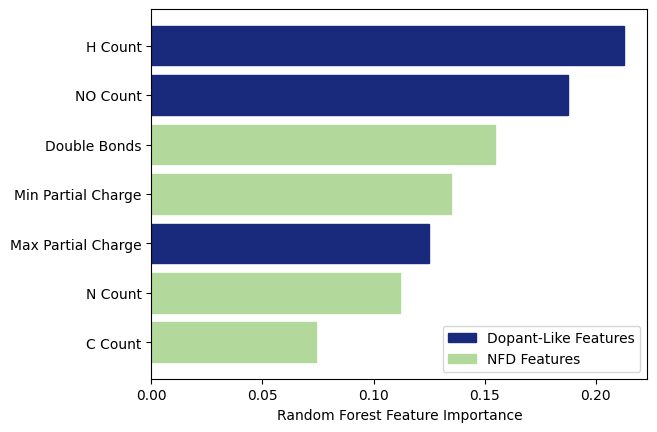

In [5]:
import matplotlib.patches as mpatches

rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

sorted_idx = rfr.feature_importances_.argsort()
bars = plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
bars[0].set_color('#B3D89C')
bars[1].set_color('#B3D89C')
bars[2].set_color('#19297C')
bars[3].set_color('#B3D89C')
bars[4].set_color('#B3D89C')
bars[5].set_color('#19297C')
bars[6].set_color('#19297C')
plt.xlabel("Random Forest Feature Importance")

both = mpatches.Patch(color='#19297C', label='Dopant-Like Features')
hv = mpatches.Patch(color='#B3D89C', label='NFD Features')
plt.legend(handles=[both, hv])

plt.rc('font', **font)

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

from sklearn.metrics import mean_squared_error

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

Mean Absolute Error: 0.13 degrees.
R2:  0.8951633879028897
MSE:  0.03744223971228394
RMSE:  0.19349997341675254


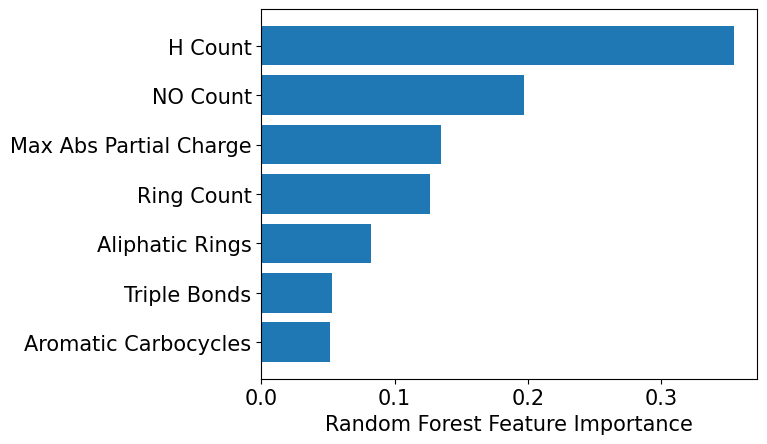

In [8]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['HOMO_calc']
X = data.loc[:, ['Max Abs Partial Charge', 'NO Count',
         'Ring Count', 'Aliphatic Rings', 'Aromatic Carbocycles',
         'H Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()

rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)